<a href="https://colab.research.google.com/github/aa1reXo/Agentic-AI/blob/main/Ax_QLC_02_Build_a_multi_user_conversational_Tool_use_Agentic_AI_System_with_Langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a ReAct AI Agent from scratch with LangGraph

This demo will cover building AI Agents with LangGraph from scratch.

Here we'll create a simple ReAct agent app that can search the web and check the weather. The app consists of an agent (LLM) and tools. As we interact with the app, we will first call the agent (LLM) to decide if we should use tools. Then we will run a loop:

- If the agent said to take an action (i.e. call tool), we'll run the tools and pass the results back to the agent
- If the agent did not ask to run tools, we will finish (respond to the user)

We will implement this in LangGraph completely from scratch step by step.


There will be three parts to this hands-on demo:

- Part I: Build a Basic Chatbot with LangGraph
- Part II: Build a simple ReAct Agent with LangGraph - LLM + Tools
- Part III: Build a multi-user conversational ReAct Agent with LangGraph

## Install OpenAI, and LangChain dependencies

In [ ]:
!pip install langchain==0.3.12
#!pip install langchain-openai==0.2.12
!pip install langchain-community==0.3.12
!pip install langgraph==0.2.56
!pip install langgraph-checkpoint-sqlite==2.0.1
!pip install beautifulsoup4
!pip install langchain-google-genai==2.0.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.9/326.9 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.8
    Uninstalling langsmith-0.3.8:
      Successfully uninstalled langsmith-0.3.8
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.18
    Uninstalling langchain-0.3.18:
      Successfully uninstalled langchain-0.3.18
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.5 MB/s eta 0:00:00


## Enter Open AI API Key

In [ ]:
from getpass import getpass

# OPENAI_KEY = getpass('Enter your OpenAI Key: ')
GEMINI_API_KEY = getpass('Enter your Google Gemini API Key: ')

Enter your Google Gemini API Key: ··········


## Enter WeatherAPI API Key

Get a free API key from [here](https://www.weatherapi.com/signup.aspx)

In [ ]:
WEATHER_API_KEY = getpass('Enter WeatherAPI API Key: ')

Enter WeatherAPI API Key: ··········


## Enter Tavily Search API Key

Get a free API key from [here](https://tavily.com/#api)

In [ ]:
TAVILY_API_KEY = getpass('Enter Tavily Search API Key: ')

Enter Tavily Search API Key: ··········


## Setup Environment Variables

In [ ]:
import os

# os.environ['OPENAI_API_KEY'] = OPENAI_KEY
os.environ["GOOGLE_API_KEY"] = GEMINI_API_KEY
os.environ['TAVILY_API_KEY'] = TAVILY_API_KEY

In [ ]:
from langchain_community.utilities.tavily_search import TavilySearchAPIWrapper
from langchain_core.tools import tool
import json
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup

tavily_search = TavilySearchAPIWrapper()

@tool
def search_web(query: str) -> list:
    """Search the web for a query. Userful for general information or general news"""
    results = tavily_search.raw_results(query=query,
                                        max_results=8,
                                        search_depth='advanced',
                                        include_answer=False,
                                        include_raw_content=True)
    return results

@tool
def get_weather(query: str) -> list:
    """Search weatherapi to get the current weather."""
    base_url = "http://api.weatherapi.com/v1/current.json"
    complete_url = f"{base_url}?key={WEATHER_API_KEY}&q={query}"

    response = requests.get(complete_url)
    data = response.json()
    if data.get("location"):
        return data
    else:
        return "Weather Data Not Found"

In [ ]:
search_web.invoke('Latest LLMs released')

{'query': 'Latest LLMs released',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://explodingtopics.com/blog/list-of-llms',
   'title': 'Best 22 Large Language Models (LLMs) (February 2025)',
   'content': "Inflection-2.5 is the latest large language model (LLM) developed by Inflection AI to power its conversational AI assistant, Pi. Significant upgrades have been made, as the model currently achieves over 94% of GPT-4’s average performance while only having 40% of the training FLOPs. In March 2024, the Microsoft-backed startup reached 1+ million daily active users on Pi. 13. Gemma is a series of lightweight open-source language models developed and released by Google DeepMind. Pythia is a series of 16 large language models developed and released by EleutherAI, a non-profit AI research lab. Alpaca is a 7 billion-parameter language model developed by a Stanford research team and fine-tuned from Meta's LLaMA 7B model.",
   'score': 0.85216236,
  

In [ ]:
get_weather.invoke('Hyderabad')

{'location': {'name': 'Hyderabad',
  'region': 'Telangana',
  'country': 'India',
  'lat': 17.3753,
  'lon': 78.4744,
  'tz_id': 'Asia/Kolkata',
  'localtime_epoch': 1740080314,
  'localtime': '2025-02-21 01:08'},
 'current': {'last_updated_epoch': 1740079800,
  'last_updated': '2025-02-21 01:00',
  'temp_c': 22.1,
  'temp_f': 71.8,
  'is_day': 0,
  'condition': {'text': 'Mist',
   'icon': '//cdn.weatherapi.com/weather/64x64/night/143.png',
   'code': 1030},
  'wind_mph': 2.2,
  'wind_kph': 3.6,
  'wind_degree': 135,
  'wind_dir': 'SE',
  'pressure_mb': 1017.0,
  'pressure_in': 30.03,
  'precip_mm': 0.0,
  'precip_in': 0.0,
  'humidity': 100,
  'cloud': 50,
  'feelslike_c': 24.4,
  'feelslike_f': 75.8,
  'windchill_c': 24.1,
  'windchill_f': 75.5,
  'heatindex_c': 25.2,
  'heatindex_f': 77.3,
  'dewpoint_c': 12.1,
  'dewpoint_f': 53.8,
  'vis_km': 4.0,
  'vis_miles': 2.0,
  'uv': 0.0,
  'gust_mph': 4.6,
  'gust_kph': 7.3}}

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

tools = [search_web, get_weather]
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
llm_with_tools = llm.bind_tools(tools)

In [ ]:
llm_with_tools.invoke('What is AI in 1 line')

{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}


AIMessage(content='AI, or artificial intelligence, is the ability of a computer to perform tasks that normally require human intelligence.\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-5b7abb29-029e-440d-ba87-49e0853cf42c-0', usage_metadata={'input_tokens': 65, 'output_tokens': 22, 'total_tokens': 87})

In [ ]:
llm_with_tools.invoke('What are some of the latest LLMs released')

{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}


AIMessage(content='', additional_kwargs={'function_call': {'name': 'search_web', 'arguments': '{"query": "latest large language models released"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-9caca380-9768-483d-a19f-9c1eedbb0d51-0', tool_calls=[{'name': 'search_web', 'args': {'query': 'latest large language models released'}, 'id': 'de89a4c8-e22a-402c-b66a-2ec4b1975228', 'type': 'tool_call'}], usage_metadata={'input_tokens': 67, 'output_tokens': 9, 'total_tokens': 76})

### Build the Agentic Graph with LangGraph built-ins - Recommended Flow

Here we will use LangGraph to build the full graph which will have the Agentic workflow.

Each functionality will be implemented as we would in the real-world.

Here we will be replacing our `BasicToolNode` for the prebuilt [ToolNode](https://langchain-ai.github.io/langgraph/reference/prebuilt/#toolnode),
and our `route_tools` condition with the prebuilt [tools_condition](https://langchain-ai.github.io/langgraph/reference/prebuilt/#tools_condition)

In [ ]:
from typing import Annotated

#from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

# define function which will be used to store all agent messages
class State(TypedDict):
    messages: Annotated[list, add_messages]

# start the graph building
graph_builder = StateGraph(State)

# add tools and bind to LLM
tools = [search_web, get_weather]
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
llm_with_tools = llm.bind_tools(tools)

# add the LLM to graph
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

# Add tools to a node
tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

# add conditional edges
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
    ['tools', '__end__']
)

# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
# Define entry point to the graph
graph_builder.set_entry_point("chatbot")
# compile the graph
agent = graph_builder.compile()

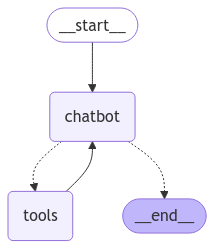

In [ ]:
from IPython.display import Image, display, Markdown

display(Image(agent.get_graph().draw_mermaid_png()))

In [ ]:
prompt = """What are some of the latest LLMs released?"""
response = agent.invoke({"messages": ("user", prompt)})
response

{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'search_web', 

{'messages': [HumanMessage(content='What are some of the latest LLMs released?', additional_kwargs={}, response_metadata={}, id='71f92e9e-9951-43b1-bf53-b40e27a72097'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'search_web', 'arguments': '{"query": "latest large language models released"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-c3eae8fe-0608-4449-b331-72232036d867-0', tool_calls=[{'name': 'search_web', 'args': {'query': 'latest large language models released'}, 'id': '6248d479-40b6-49d9-a65e-123ccf1e478f', 'type': 'tool_call'}], usage_metadata={'input_tokens': 68, 'output_tokens': 9, 'total_tokens': 77}),
  ToolMessage(content='{"query": "latest large language models released", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://explodingtopics.com/blog/list-of-llms", "title": "Best 22 Large Language Models (LLMs) (February 

In [ ]:
display(Markdown(response['messages'][-1].content))

Based on the web search results, here are some of the latest LLMs released, keeping in mind that the information has publication dates up to February 2025:

*   **DeepSeek R1:** Released in January 2025 by DeepSeek, this open-source reasoning model excels in math and coding.
*   **GPT-4o:** Launched in May 2024 by OpenAI, this multimodal model integrates text, image, video, and voice capabilities.
*   **Claude 3.5 Sonnet:** Released in June 2024 by Anthropic as an upgrade to Claude 3, this model is known for its coding and text reasoning capabilities.
*   **Llama 3.1:** Released in June 2024 by Meta AI, this is the latest version of Llama 3 with 405 billion parameters.
*   **Nemotron-4:** Released in June 2024 by NVIDIA, this family of large language models is designed for synthetic data generation and AI model training.

In [ ]:
prompt = """What are its key features"""
response = agent.invoke({"messages": ("user", prompt)})
display(Markdown(response['messages'][-1].content))

{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}


Could you please specify what you are referring to?


In [ ]:
def call_agent(agent, prompt):
    events = agent.stream(
        {"messages": [{"role": "user", "content": prompt}]},
        {"configurable": {"thread_id": "any"}},
        stream_mode="values",
    )

    for event in events:
        event["messages"][-1].pretty_print()

    print()
    print('Final Response:\n')
    display(Markdown(event["messages"][-1].content))

In [ ]:
prompt = """What is the weather in bangalore?
show detailed statistics"""
call_agent(agent, prompt)

================================ Human Message =================================

What is the weather in bangalore?
show detailed statistics
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'requi

The weather in Bangalore, India is clear with a temperature of 20.3 degrees Celsius (68.5 degrees Fahrenheit). The humidity is 73%, and the wind is coming from the ESE at 14 kph (8.7 mph). The dewpoint is 13.1 degrees Celsius (55.5 degrees Fahrenheit), and it feels like 20.3 degrees Celsius (68.5 degrees Fahrenheit). The pressure is 1018 mb, and visibility is 6 km. Last updated at 2025-02-21 01:15.

In [ ]:
prompt = """What is the weather in hyderabad?
show detailed statistics"""
call_agent(agent, prompt)

================================ Human Message =================================

What is the weather in hyderabad?
show detailed statistics
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'requi

The weather in Hyderabad, India is currently 22.3 degrees Celsius. It feels like 24.4 degrees Celsius. The humidity is 100%. There is mist. The wind is coming from the SE at 3.6 kph.

In [ ]:
prompt = """Which city is hotter?"""
call_agent(agent, prompt)

================================ Human Message =================================

Which city is hotter?
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'f

Could you please provide the names of the cities you want me to compare?


We have successfully built an AI Agent which can search the web, get weather for us but it is not yet conversational. We will add in the that functionality in Part III next.

## Build a multi-user conversational ReAct Agent with LangGraph

Now, we will build a multi-user conversational ReAct agent with LangGraph which will use the web search or weather tool based on our input prompts to get relevant data which the LLM might not know by default and give relevant responses

Our agentic chatbot from Part II can use tools to answer user questions, but it doesn't remember the context of previous interactions. This limits its ability to have coherent, multi-turn conversations.

LangGraph solves this problem through **persistent checkpointing**. If you provide a `checkpointer` when compiling the graph and a `thread_id` when calling your graph, LangGraph automatically saves the state after each step. When you invoke the graph again using the same `thread_id`, the graph loads its saved state, allowing the chatbot to pick up where it left off.

**checkpointing** is _much_ more powerful than simple chat memory - it lets you save and resume complex state at any time for error recovery, human-in-the-loop workflows, time travel interactions, and more

While the legacy syntax uses `session_id`, in LangGraph, each user session is identified by `thread_id`

We will use `SqliteSaver` which helps to store separate conversation histories per user or session.

This will help us build a conversational Agentic Chatbot which will be accessed by many users at the same time.



In [ ]:
# removes the memory database file - usually not needed
# you can run this only when you want to remove ALL conversation histories
# ok if you get rm: cannot remove 'memory.db': No such file or directory  because initially no memory exists
!rm memory.db*

rm: cannot remove 'memory.db*': No such file or directory


In [ ]:
from langgraph.checkpoint.sqlite import SqliteSaver

def chat_with_agent(agent_graph, prompt, session_id, verbose=False):
    with SqliteSaver.from_conn_string("memory.db") as memory:
        agent = agent_graph.compile(checkpointer=memory)
        events = agent.stream(
            {"messages": [{"role": "user", "content": prompt}]},
            {"configurable": {"thread_id": session_id}},
            stream_mode="values",
        )

        print('Running Agent, please wait...')
        for event in events:
            if verbose:
                event["messages"][-1].pretty_print()

    display(Markdown(event["messages"][-1].content))

In [ ]:
graph_builder

Let's now simulate User 1 using the agent

In [ ]:
user_id = 'jack001'
prompt = "Tell me about recent LLMs released"
chat_with_agent(graph_builder, prompt, user_id, verbose=True)

Running Agent, please wait...
================================ Human Message =================================

Tell me about recent LLMs released
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 

Based on the web search results, here are some of the recent LLMs that have been released:

*   **GPT-4o:** OpenAI's latest model, released in May 2024, integrates text, image, video, and voice capabilities. Claims to be 50% cheaper and twice as fast as GPT-4.
*   **Claude 3.5 Sonnet:** Launched by Anthropic in June 2024, known for its ethical design and strong performance.
*   **Llama 3.1:** Meta AI's Llama 3.1 models were released in July 2024, including both a 405 billion and 70 billion parameter model
*   **Nemotron-4 340B:** Nvidia released the Nemotron-4 340B family of models in June 2024 for synthetic data generation and AI model training.
*   **Gemma 2:** Google DeepMind released Gemma 2 in June 2024, a family of open-source language models.
*   **DeepSeek R1:** DeepSeek released the DeepSeek-R1 model in January 2025, an open-source reasoning model excelling in math and coding.

In [ ]:
prompt = "What about reasoning LLMs?"
chat_with_agent(graph_builder, prompt, user_id, verbose=True)

Running Agent, please wait...
================================ Human Message =================================

What about reasoning LLMs?
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'require

Based on the search results, here's what I found about reasoning LLMs:

*   **DeepSeek-R1:** This model is explicitly mentioned as a reasoning model excelling in tasks with complex reasoning, mathematical problem-solving, and logical inference. It utilizes reinforcement learning techniques.
*   **OpenAI o1 model family:** Introduced in September 2024, these models focus on reasoning through a problem or query before offering a response. They reportedly excel in STEM fields, particularly mathematical reasoning, code generation, and scientific research.
*   There's a trend towards Large Reasoning Models (LRMs) that operate on "ideas" rather than tokens, aiming to emulate human reasoning more effectively.
*   Techniques like Natural Language Embedded Programs (NLEPs) are being developed to improve the reasoning capabilities of LLMs by generating programs to solve tasks.
*   The paper "Logical Reasoning in Large Language Models: A Survey" synthesizes recent advancements in logical reasoning within LLMs.

In [ ]:
prompt = "What are the four major design patterns for creating agentic ai systems?"
chat_with_agent(graph_builder, prompt, user_id, verbose=False)

Running Agent, please wait...
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items':

Okay, based on the search results, here are four major design patterns for creating agentic AI systems, as highlighted by Andrew Ng and other sources:

1.  **Reflection:** This involves the AI agent evaluating and refining its own outputs iteratively. The agent analyzes its performance, identifies errors or areas for improvement, and adjusts its strategy accordingly. It promotes self-correction and can significantly improve the quality of results.

2.  **Tool Use:** This pattern equips AI agents with the ability to access and utilize external tools, APIs, or resources to enhance their problem-solving capabilities. Instead of relying solely on internal knowledge, the agent can interact with the real world, retrieve data, perform computations, and more.

3.  **Planning:** This enables AI agents to break down complex tasks into smaller, more manageable subtasks. The agent creates a roadmap of actions and determines the most efficient path to achieve the overall goal. This strategic thinking helps to solve tasks more effectively and avoid confusion.

4.  **Multi-Agent Collaboration:** This pattern involves orchestrating multiple AI agents with different roles or functions to work together on a complex task. The agents collaborate, communicate, and delegate subtasks to achieve a unified outcome. This approach mirrors how humans collaborate across specialties.


Let's now simulate User 2 using the agent

In [ ]:
user_id = 'bond007'
prompt = "how is the weather in Hyderabad today? Show detailed statistics"
chat_with_agent(graph_builder, prompt, user_id, verbose=False)

Running Agent, please wait...
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items':

The weather in Hyderabad, Telangana, India is currently:
- Temperature: 22.3°C (72.1°F)
- Feels like: 24.4°C (75.9°F)
- Humidity: 100%
- Cloud cover: 50%
- Condition: Mist
- Wind: 3.6 kph from SE
- Pressure: 1017 mb
- Visibility: 4 km


In [ ]:
user_id = 'bond007'
prompt = "what about Dubai?"
chat_with_agent(graph_builder, prompt, user_id, verbose=False)

Running Agent, please wait...
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items':

The weather in Dubai, United Arab Emirates is currently:
- Temperature: 23.2°C (73.8°F)
- Feels like: 25°C (77°F)
- Humidity: 65%
- Cloud cover: 0%
- Condition: Clear
- Wind: 13.3 kph from NE
- Pressure: 1011 mb
- Visibility: 10 km


In [ ]:
user_id = 'bond007'
prompt = "which city is hotter?"
chat_with_agent(graph_builder, prompt, user_id, verbose=True)

Running Agent, please wait...
================================ Human Message =================================

which city is hotter?
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': [

Dubai is hotter than Hyderabad. Dubai feels like 25°C (77°F) while Hyderabad feels like 24.4°C (75.9°F).


In [ ]:
user_id = 'jack001'
prompt = "what are the top frameworks to build such systems?"
chat_with_agent(graph_builder, prompt, user_id, verbose=False)

Running Agent, please wait...
{'name': 'search_web', 'description': 'Search the web for a query. Userful for general information or general news', 'parameters': {'type_': 6, 'description': 'Search the web for a query. Userful for general information or general news', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'get_weather', 'description': 'Search weatherapi to get the current weather.', 'parameters': {'type_': 6, 'description': 'Search weatherapi to get the current weather.', 'properties': {'query': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items':

From the search results, here are some top frameworks for building agentic AI systems:

*   **LangChain:** A widely adopted framework known for its modularity, extensive set of tools and abstractions, and integrations with various LLMs and external resources. It's suitable for enterprise development and building foundational blocks for GenAI applications.
*   **LangGraph:** An open-source framework by the LangChain team designed specifically for agentic architectures. It focuses on stateful design, graph-based workflows, and multi-agent capabilities.
*   **AutoGen:** A Microsoft framework for building multi-agent conversational AI systems. It supports asynchronous messaging, is modular and extensible, and offers tools for observability and debugging.
*   **Semantic Kernel:** Another Microsoft framework, this one as an SDK designed for creating enterprise-ready applications with strong integration capabilities. It supports multiple programming languages and offers agent and process frameworks.
*   **LlamaIndex:** While starting as a data framework, LlamaIndex has evolved to cover AI agents, offering document parsing & indexing, workflows, and connectors. It's a compelling alternative to LangChain, particularly for data-intensive LLM applications.
*   **CrewAI:** A framework that simplifies the orchestration of autonomous agents, enabling the creation of "crews" of AI agents with specific roles to work together.
*   **Haystack:** An open-source framework for building production-ready LLM applications, RAG pipelines, and complex search applications.

These frameworks provide various tools and abstractions to simplify the development of complex agentic systems, including pre-built components, communication protocols, task management systems, and integration tools.
